In [40]:
#importing libraries

import random as rd
import matplotlib.pyplot as plt
from timeit import default_timer as timer
import rsa
import numpy as np


In [41]:
#declaring of varibles
numberOfExperts = 0
numberOfCandidates = 0


#Collection of rsa public and private keys for digital signature
dictOfrsaPubKey = {}
dictOfrsaPriKey = {}
marksToCandidates = []


In [42]:
def initVariables(E,C):
    global numberOfExperts, numberOfCandidates
    numberOfExperts, numberOfCandidates = E, C


In [43]:
#code to generate rsa public and private keys
def generateRSAKeys():
    global dictOfrsaPubKey, dicOfrsaPriKey
    for i in range(numberOfExperts):
        (pubkey, privkey) = rsa.newkeys(512)
        dictOfrsaPubKey[i],dictOfrsaPriKey[i] = pubkey, privkey 


In [44]:
# function to create digital signature
def createDigitalSignature(message,i):
    privkey = dictOfrsaPriKey[i]
    temp = str(message).encode()
    signature = rsa.sign(temp, privkey, 'SHA-1')
    return signature

In [45]:
#this part of the code finds the highest marks gaining candidate id this acts as the candidate manager for the first frame work
def candidateManagerFrameWork1BestCandidate():
    array  = []
    for i in range(len(marksToCandidates[0])):
        sum = 0
        for j in range(len(marksToCandidates)):
            sum = sum + marksToCandidates[j][i][0]
        # print(sum)
        array.append(sum)
    return array


In [46]:
def employerSelectsBestCandidate(array):
    return array.index(max(array))

In [47]:
#this part of the code defines the first frame work
def expertFunctionToGiveMarks():
    global marksToCandidates
    marksToCandidates = [[0 for i in range(numberOfCandidates)] for j in range(numberOfExperts)]
    start = timer()
    for i in range(numberOfExperts):
        for j in range(numberOfCandidates):
            mark = rd.randint(0,10)
            marksToCandidates[i][j] = [mark,createDigitalSignature(mark,i)]
    end = timer()
    return (end - start)

In [48]:
def runSimulation(experts,candidates,flag):
    experts = experts
    timeList = []
    candidates = candidates
    totalTime = 0
    if flag == "candidates":
        for i in range(len(candidates)):
            start = timer()
            initVariables(experts,candidates[i])
            generateRSAKeys()
            end = timer()
            t1 = end - start
            t2 = expertFunctionToGiveMarks()
            start = timer()
            array = candidateManagerFrameWork1BestCandidate()
            employerSelectsBestCandidate(array)
            end = timer()
            t3 = end - start
            totalTime =  t1 + (t2 / experts) + t3
            timeList.append(totalTime)
    else: 
        for i in range(len(experts)):
            start = timer()
            initVariables(experts[i],candidates)
            generateRSAKeys()
            end = timer()
            t1 = end - start
            t2 = expertFunctionToGiveMarks()
            start = timer()
            array = candidateManagerFrameWork1BestCandidate()
            employerSelectsBestCandidate(array)
            end = timer()
            t3 = end - start
            totalTime = t1 + (t2 / experts[i]) + t3
            timeList.append(totalTime)
    return (timeList)

In [49]:
#this part of the code run the simulation for defined number of times and helps us to calcuate average execution time
def averageTimeConsumedFunction(experts, candidates,flag):
    timeMatrix = []
    for i in range(0,80):
        timeList= runSimulation(experts, candidates,flag)
        timeMatrix.append(timeList)
    # print(timeMatrix)        
    arr = np.array(timeMatrix, dtype='float32')
    # print(arr)
    columns_average = arr.mean(axis=0)

    if flag == "candidates":
        plt.title("number of experts " + str(experts) )
        plt.xlabel("number Of Candidates")
        plt.ylabel("Average Execution Time")   
        plt.bar(candidates, columns_average)
        plt.show()
        print(columns_average)
    else :
        plt.title("number of candidates " + str(candidates))
        plt.xlabel("number Of Experts")
        plt.ylabel("Average Execution Time")   
        plt.bar(experts, columns_average)
        plt.show()
        print(columns_average)
    
    return columns_average

        

In [50]:
def simulationHavingExpertsConstCandidatesVariable(experts, candidates,flag):
    column_average = averageTimeConsumedFunction(experts,candidates,flag)
    return column_average
    

In [51]:
def simulationHavingExpertsvariableCandidatesConst(experts,candidates,flag):
    column_average = averageTimeConsumedFunction(experts,candidates,flag)
    return column_average

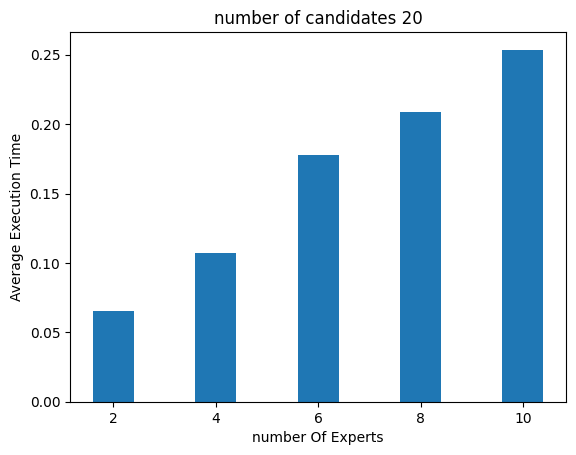

[0.06512802 0.10742996 0.17782222 0.20885399 0.2536047 ]


In [52]:
time =  simulationHavingExpertsvariableCandidatesConst([2,4,6,8,10],20,"experts")

In [53]:
F1Time = []
F1Time = time

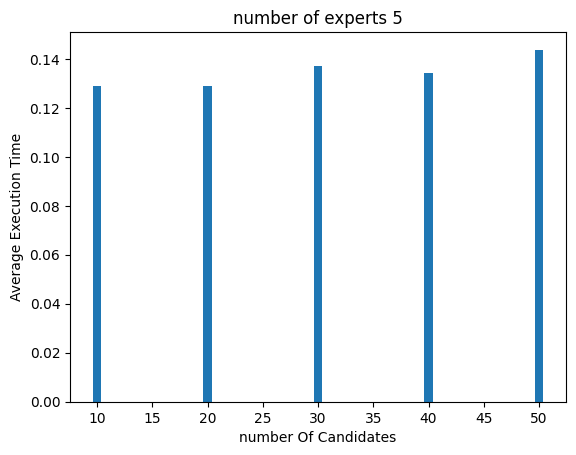

[0.12896612 0.12909788 0.13710365 0.13431571 0.14372678]


In [54]:
time = simulationHavingExpertsConstCandidatesVariable(5,[10,20,30,40,50],"candidates")
F1TimeCandidateVariable = []
F1TimeCandidateVariable = time

In [55]:
%store -r F2Time
%store -r F3Time
%store -r F4Time
%store -r F2TimeCandidateVariable
%store -r F3TimeCandidateVariable
%store -r F4TimeCandidateVariable

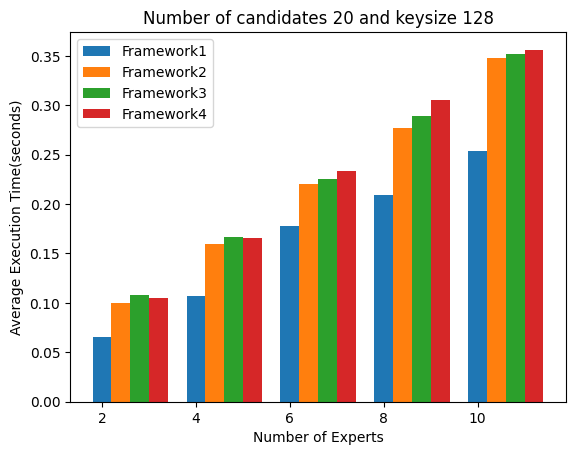

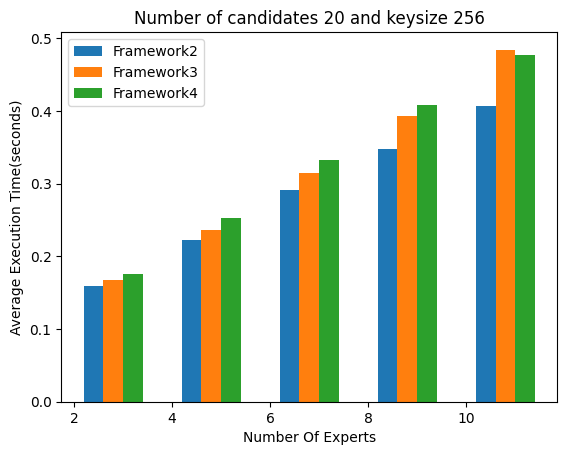

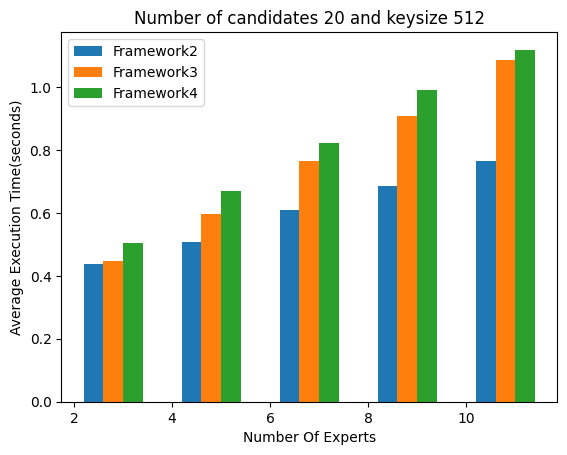

In [56]:
for i in range(0,3):
    X = [2,4,6,8,10] 
    width = 0.2
    X_axis = np.arange(len(X)) 
    
    if i == 0 :
        plt.bar(X_axis , F1Time, width, label = 'Framework1') 
        plt.bar(X_axis + width  , F2Time[i], width, label = 'Framework2') 
        plt.bar(X_axis + width * 2 , F3Time[i], width, label = 'Framework3') 
        plt.bar(X_axis + width * 3 , F4Time[i], width, label = 'Framework4') 
        
        plt.xticks(X_axis, X) 
        plt.xlabel("Number of Experts") 
        plt.ylabel("Average Execution Time(seconds)") 
        plt.title("Number of candidates 20 and keysize 128"  ) 
        plt.legend() 
        plt.show()
        
    else:
        
        plt.bar(X_axis + width  , F2Time[i], width, label = 'Framework2') 
        plt.bar(X_axis + width * 2 , F3Time[i], width, label = 'Framework3') 
        plt.bar(X_axis + width * 3 , F4Time[i], width, label = 'Framework4') 
        
        plt.xticks(X_axis, X) 
        plt.xlabel("Number Of Experts") 
        plt.ylabel("Average Execution Time(seconds)") 
        plt.title("Number of candidates 20 and keysize " + str(128 * (i * 2))) 
        plt.legend() 
        plt.show()

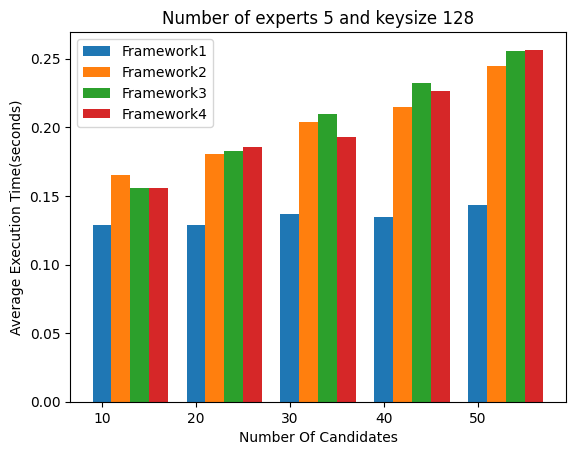

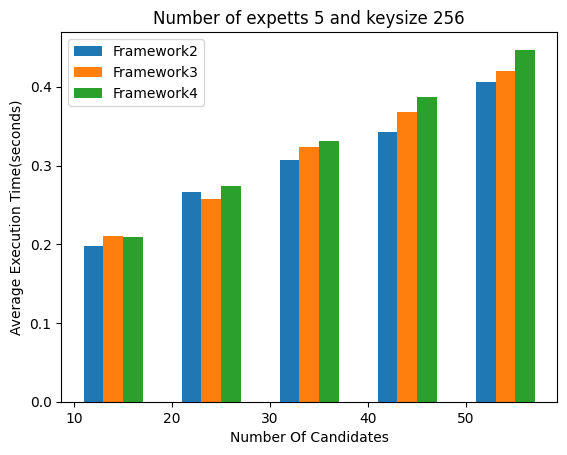

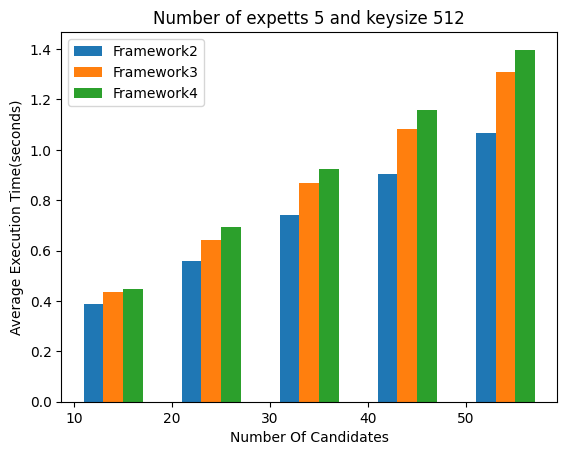

In [57]:
for i in range(0,3):
    X = [10,20,30,40,50] 
    width = 0.2
    X_axis = np.arange(len(X)) 
    
    if i == 0 :
        plt.bar(X_axis , F1TimeCandidateVariable, width, label = 'Framework1') 
        plt.bar(X_axis + width  , F2TimeCandidateVariable[i], width, label = 'Framework2') 
        plt.bar(X_axis + width * 2 , F3TimeCandidateVariable[i], width, label = 'Framework3') 
        plt.bar(X_axis + width * 3 , F4TimeCandidateVariable[i], width, label = 'Framework4') 
        
        plt.xticks(X_axis, X) 
        plt.xlabel("Number Of Candidates") 
        plt.ylabel("Average Execution Time(seconds)") 
        plt.title("Number of experts 5 and keysize 128"  ) 
        plt.legend() 
        plt.show()
    else:
        
        plt.bar(X_axis + width  , F2TimeCandidateVariable[i], width, label = 'Framework2') 
        plt.bar(X_axis + width * 2 , F3TimeCandidateVariable[i], width, label = 'Framework3') 
        plt.bar(X_axis + width * 3 , F4TimeCandidateVariable[i], width, label = 'Framework4') 
        
        plt.xticks(X_axis, X) 
        plt.xlabel("Number Of Candidates") 
        plt.ylabel("Average Execution Time(seconds)") 
        plt.title("Number of expetts 5 and keysize " + str(128 * (i * 2))) 
        plt.legend() 
        plt.show()

In [58]:
print(F1Time)
print(F2Time)
print(F3Time)
print(F4Time)

[0.06512802 0.10742996 0.17782222 0.20885399 0.2536047 ]
[array([0.10035453, 0.15999338, 0.21987705, 0.27669403, 0.34748656],
      dtype=float32), array([0.15916553, 0.22226207, 0.29170543, 0.3475999 , 0.40621358],
      dtype=float32), array([0.43731904, 0.5083461 , 0.60942733, 0.68646294, 0.76347315],
      dtype=float32)]
[array([0.10847409, 0.16651617, 0.22485438, 0.2893665 , 0.3517712 ],
      dtype=float32), array([0.1668879 , 0.23661849, 0.31439716, 0.3923929 , 0.48411068],
      dtype=float32), array([0.4463703 , 0.5956633 , 0.7652558 , 0.90699494, 1.0869495 ],
      dtype=float32)]
[array([0.10492466, 0.16571982, 0.23340473, 0.30530575, 0.35615748],
      dtype=float32), array([0.17626193, 0.25216055, 0.3325161 , 0.4074003 , 0.4767108 ],
      dtype=float32), array([0.5045022, 0.6692753, 0.8214084, 0.9894457, 1.1181171],
      dtype=float32)]


In [59]:
print(F1TimeCandidateVariable)
print(F2TimeCandidateVariable)
print(F3TimeCandidateVariable)
print(F4TimeCandidateVariable)

[0.12896612 0.12909788 0.13710365 0.13431571 0.14372678]
[array([0.16549495, 0.18052115, 0.20386346, 0.21517718, 0.24437642],
      dtype=float32), array([0.19838938, 0.26681477, 0.3069989 , 0.34247148, 0.40549937],
      dtype=float32), array([0.38990447, 0.55860335, 0.7398571 , 0.9026324 , 1.068205  ],
      dtype=float32)]
[array([0.15578732, 0.18296066, 0.20998318, 0.23214214, 0.25584218],
      dtype=float32), array([0.2105813 , 0.2568459 , 0.32369462, 0.3678916 , 0.4203462 ],
      dtype=float32), array([0.43520817, 0.6419575 , 0.87025297, 1.0839794 , 1.3110349 ],
      dtype=float32)]
[array([0.15610617, 0.18564992, 0.19267304, 0.22626498, 0.2565768 ],
      dtype=float32), array([0.20946658, 0.273697  , 0.33079857, 0.38717473, 0.4470687 ],
      dtype=float32), array([0.44914562, 0.6922375 , 0.92209214, 1.1567745 , 1.3975525 ],
      dtype=float32)]
